In [171]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data1 = pd.read_csv('../../data/energy_dataset.csv')
data2 = pd.read_csv('../../data/weather_features.csv')
dataVal = data2.loc[data2["city_name"]=='Valencia']


# merge data
df = pd.merge(data1, dataVal,left_on="time",right_on="dt_iso")

df=df.drop_duplicates()
df=df.drop(columns=["temp_max","temp_min"])


# Returns list of tuples of energy and weather data sorted by correlation
def sortedCorr(data1,data2,df):
    cList = []
    # list of tuples of data and correlation
    for col1 in data2.columns:
        for col2 in data1.columns:
            if col1 != col2 and col1 in df and col2 in df:
                cf=df[[col1,col2]].corr()
                if col1 in cf and col2 in cf:
                    num = cf[col2].iloc[0]
                    if np.isnan(num)==False and num<1:
                        cList.append((num,col1,col2))

    # sort tuples based on correlation
    cList.sort(reverse=True,key = lambda x: abs(x[0]))
    return cList

# Get average values from all cities

In [220]:
names = pd.unique(data2["city_name"])
namedData=[]

# Create new dataframe for each city and store in list
for name in names:
    cityData = data2.loc[data2["city_name"]==name]
    dfn = pd.merge(data1, cityData,left_on="time",right_on="dt_iso")
    
    print(dfn.shape)
    dfn=dfn.drop_duplicates("time")
    print(dfn.shape)
    
    namedData.append(dfn)
    
print("Finished")

(35145, 46)
(35064, 46)
(36267, 46)
(35064, 46)
(35951, 46)
(35064, 46)
(35476, 46)
(35064, 46)
(35557, 46)
(35064, 46)
Finished


In [248]:
total=namedData[0]
print(namedData[0].shape)

# Add all city data frames together
for i in range(1,len(namedData)):
    total=total+namedData[i]
    print(total.shape)
print(total.shape)

(35064, 46)
(36139, 46)
(36239, 46)
(36239, 46)
(36239, 46)
(36239, 46)


In [229]:
total.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:002015-01-01 00:00:00+0...              2235.0   
1  2015-01-01 01:00:00+01:002015-01-01 01:00:00+0...              2245.0   
2  2015-01-01 02:00:00+01:002015-01-01 02:00:00+0...              2240.0   
3  2015-01-01 03:00:00+01:002015-01-01 03:00:00+0...              2190.0   
4  2015-01-01 04:00:00+01:002015-01-01 04:00:00+0...              2140.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                1645.0                                 0.0   
1                                1640.0                                 0.0   
2                                1615.0                                 0.0   
3                                1270.0                                 0.0   
4                                 935.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                24220.0                      24105.0                  810.0   
1                25980.0                      23775.0                  790.0   
2                24285.0                      22905.0                  785.0   
3                21570.0                      20655.0                  800.0   
4                20650.0                      19200.0                  780.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0  ...        10.0     676.0      0.0      0.0      0.0         0.0   
1  ...        10.0     679.0      0.0      0.0      0.0         0.0   
2  ...        12.0     595.0      0.0      0.0      0.0         0.0   
3  ...        12.0     596.0      0.0      0.0      0.0         0.0   
4  ...        12.0     592.0      0.0      0.0      0.0         0.0   

   weather_id               weather_main  \
0      4000.0  clearclearclearclearclear   
1      4000.0  clearclearclearclearclear   
2      4000.0  clearclearclearclearclear   
3      4000.0  clearclearclearclearclear   
4      4000.0  clearclearclearclearclear   

                                 weather_description    weather_icon  
0  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
1  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
2  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
3  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
4  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  

[5 rows x 46 columns]

In [230]:
totalNum = total.select_dtypes(["number"]) # Grab just numerical values
dfAvg = totalNum.applymap(lambda x: x/5) # Find average

## Finished finding avg values

In [231]:
dfAvg.head()
dfAvg.to_csv("EnergyAndAvgWeather.csv")

<AxesSubplot:>

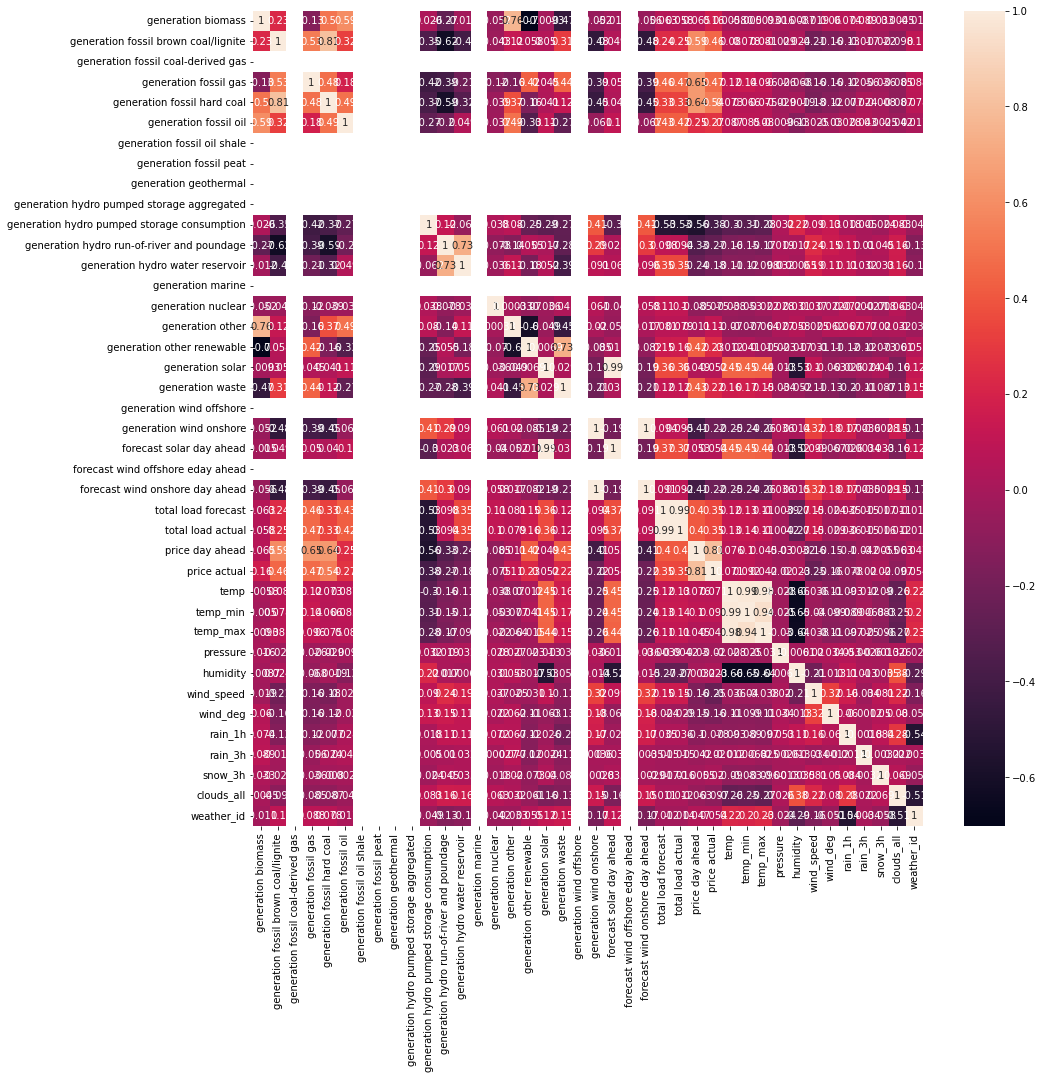

In [232]:
plt.figure(figsize=(15,15))
sns.heatmap(dfAvg.corr(), annot=True, fmt='.2g')

In [233]:
energyAvg = dfAvg.loc[:, avg.columns.isin(data1.columns)]
weatherAvg = dfAvg.loc[:, avg.columns.isin(data2.columns)]
avgCorr=sortedCorr(energyAvg,weatherAvg,dfAvg)

humidity | generation solar
-0.5292781404738623


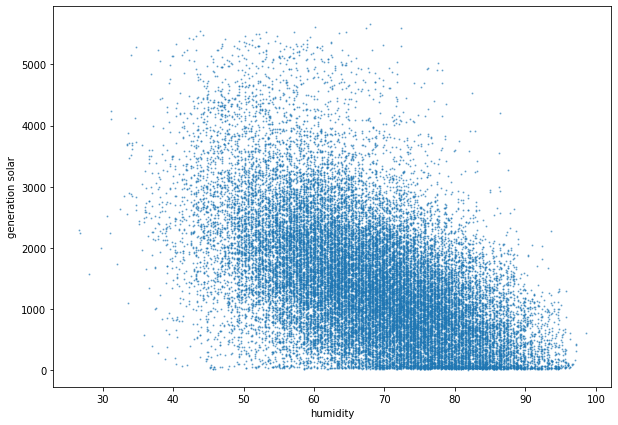

humidity | forecast solar day ahead
-0.5243971454399289


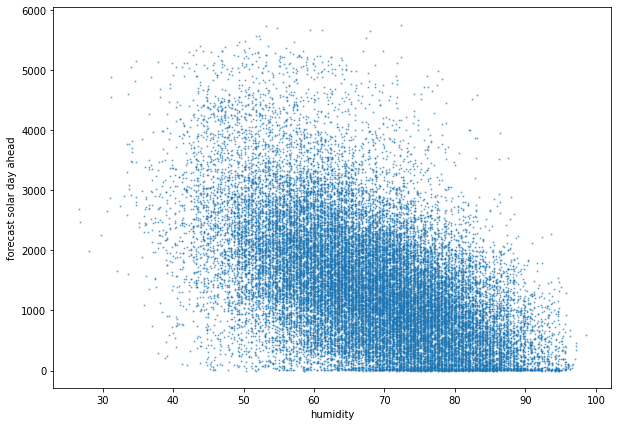

temp_min | forecast solar day ahead
0.4517198460835894


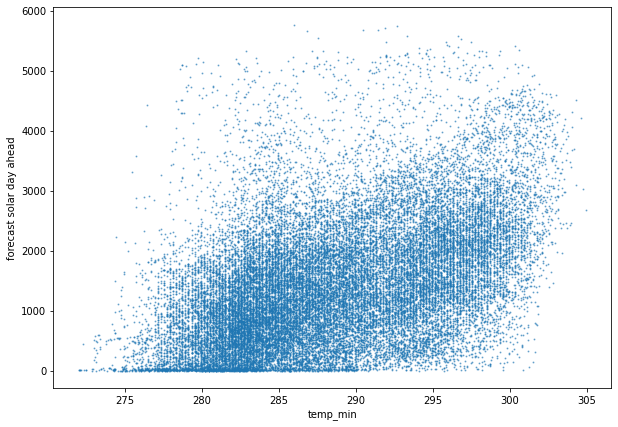

temp | forecast solar day ahead
0.45038412962149005


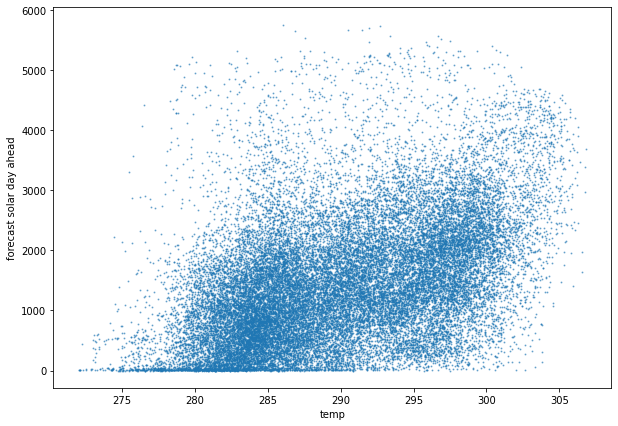

temp_min | generation solar
0.44761306388676125


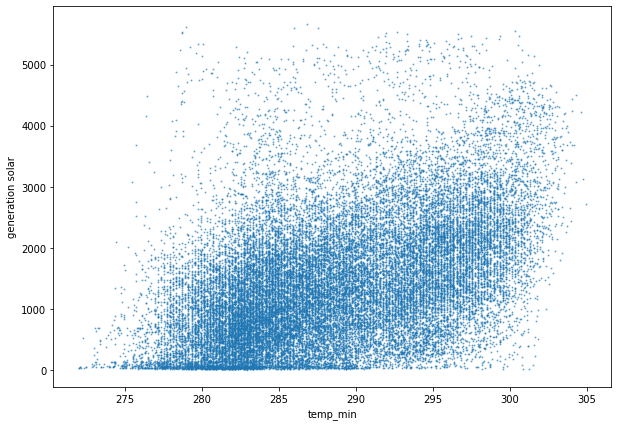

temp | generation solar
0.44632876786542586


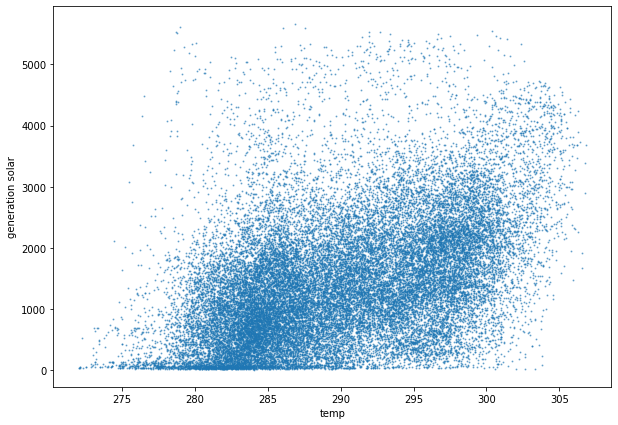

temp_max | forecast solar day ahead
0.4395970419294634


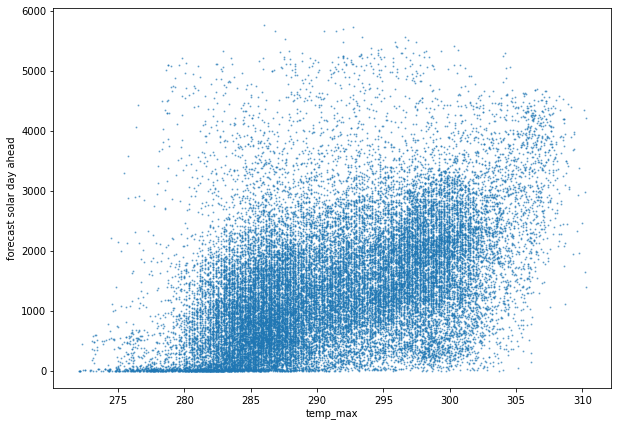

temp_max | generation solar
0.4354091683658256


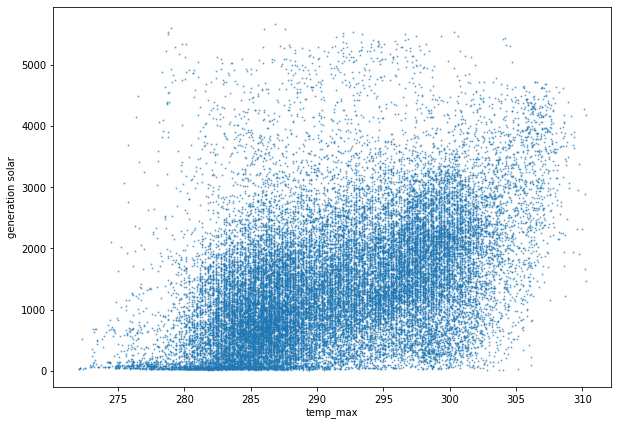

wind_speed | generation wind onshore
0.32222300340392496


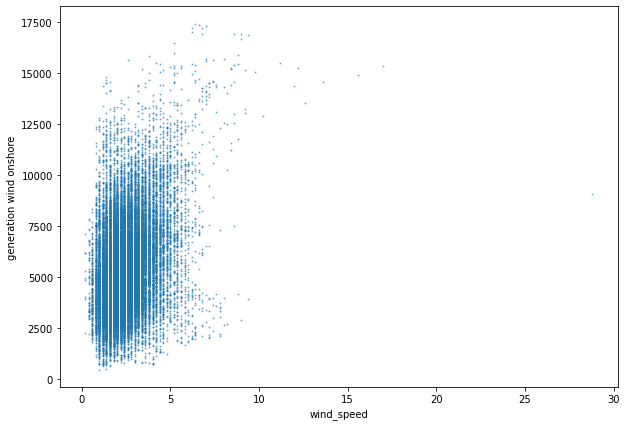

wind_speed | forecast wind onshore day ahead
0.32111505235963694


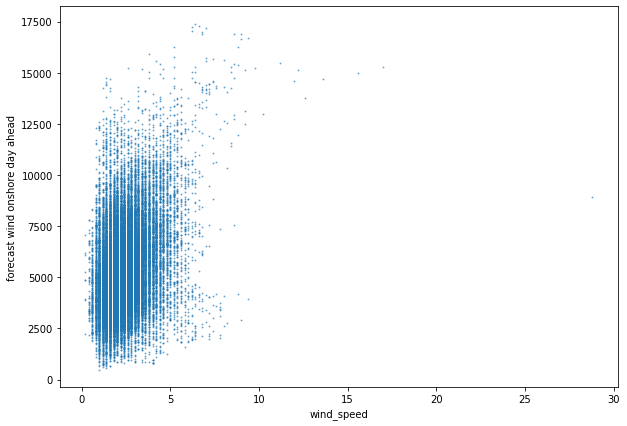

temp_min | generation hydro pumped storage consumption
-0.30934654973043596


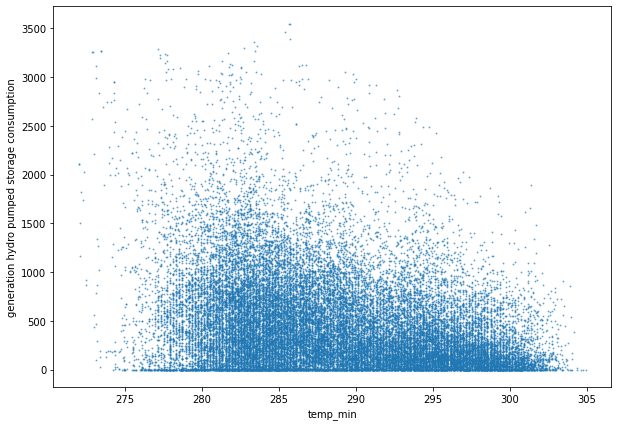

temp | generation hydro pumped storage consumption
-0.3010084076976083


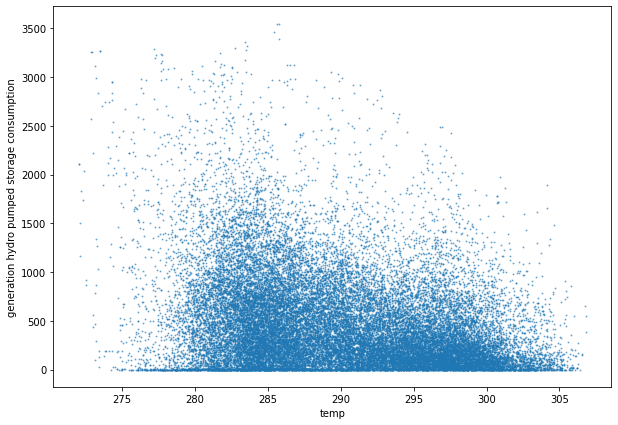

temp_max | generation hydro pumped storage consumption
-0.28447883969779086


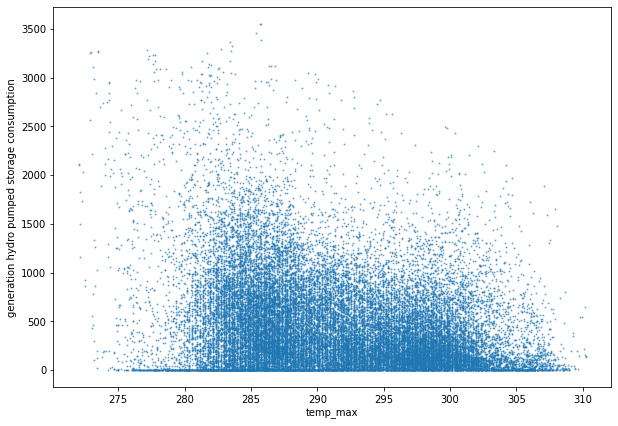

humidity | total load actual
-0.2664866489612815


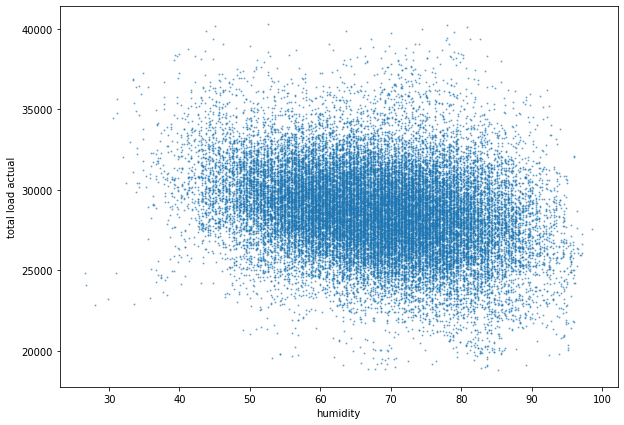

humidity | total load forecast
-0.2657917628204247


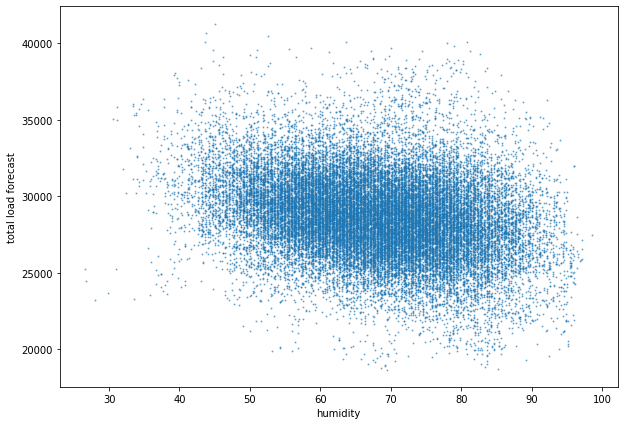

temp_max | generation wind onshore
-0.2553662564832547


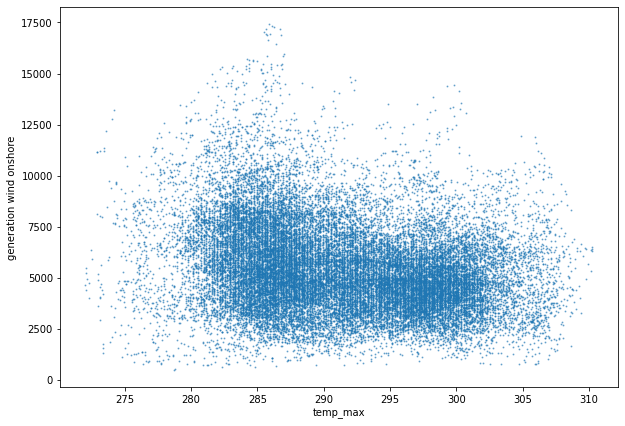

temp_max | forecast wind onshore day ahead
-0.25514457667877133


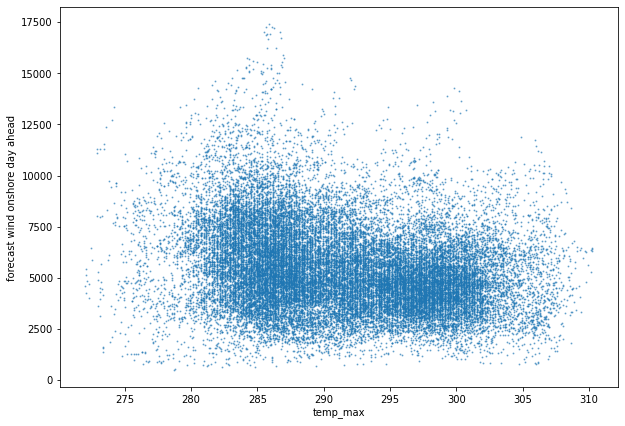

temp | generation wind onshore
-0.24877569827539475


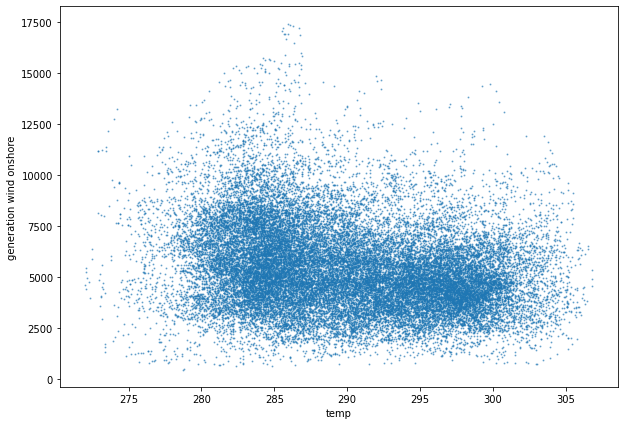

wind_speed | price actual
-0.24863588057342942


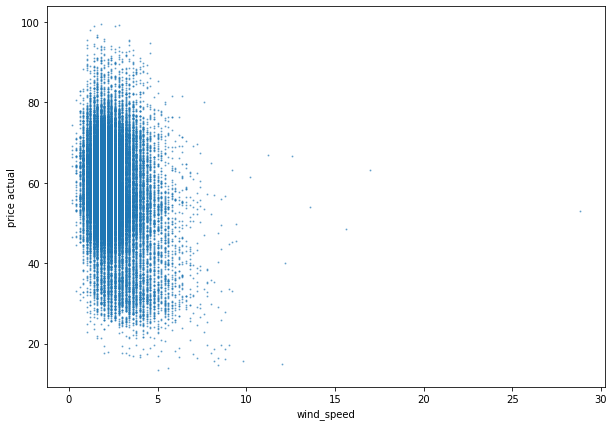

temp | forecast wind onshore day ahead
-0.24829421765031132


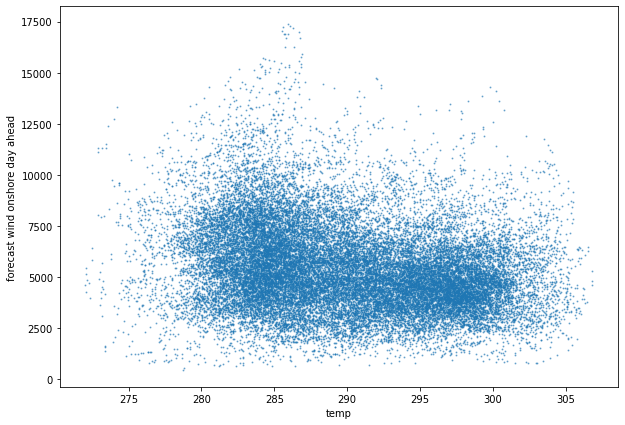

In [234]:
for tup in avgCorr[0:20]:
    # tuple data
    print(tup[1],"|",tup[2])
    print(tup[0])

    # scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(dfAvg[[tup[1]]],dfAvg[[tup[2]]], color='tab:blue', alpha=.5, s=1)
    plt.xlabel(tup[1])
    plt.ylabel(tup[2])
    plt.show()

In [256]:
dfClean = dfAvg.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
                                 'generation fossil coal-derived gas',
                                 'generation fossil oil shale', 'generation fossil peat',
                                 'generation geothermal', 'generation marine', 'generation wind offshore','rain_3h'])
print(dfClean.shape)
dfClean=dfClean.dropna()
print(dfClean.shape)
dfClean.nunique()

(36239, 31)
(32226, 31)


generation biomass                              1841
generation fossil brown coal/lignite            4689
generation fossil gas                          17853
generation fossil hard coal                    19268
generation fossil oil                           1196
generation hydro pumped storage consumption     7566
generation hydro run-of-river and poundage      6518
generation hydro water reservoir               17223
generation nuclear                              9361
generation other                                 454
generation other renewable                       299
generation solar                               14442
generation waste                                1071
generation wind onshore                        21427
forecast solar day ahead                       14553
forecast wind onshore day ahead                21328
total load forecast                            23516
total load actual                              23465
price day ahead                               

# PCA

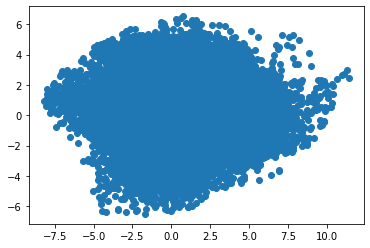

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dfPCA = StandardScaler().fit_transform(dfClean)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfPCA)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) #, 'principal component 3'


plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

# TSNE

In [258]:
from sklearn.manifold import TSNE
 
dfTSNE=dfClean
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(dfTSNE)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 


/Users/joshp/opt/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/joshp/opt/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(32226, 2)

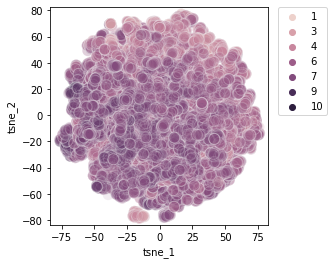

In [274]:
y = dfTSNE[['price actual']].applymap(lambda x: round(x/10))
y = y['price actual'].tolist()

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2' , hue='label' , data=tsne_result_df, ax=ax,s=120, alpha=0.1)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)